In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from sympy import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import math
import time

start_time = time.time()

In [2]:
#Some helpful functions we will use later

def errorfinder(cor_sol,value_array): #This function will be used to get the appropirate iterations needed to produce
#the wanted precision
    check_values_ar = np.array([10**(-3),10**(-6),10**(-12)]) #The values we want to test. They can be expanded accordingly
    n = len(check_values_ar)
    cond = [False]*(n)
    it_array = np.empty((0,3))
    
    for index in range(len(value_array)):
        diff = abs(cor_sol - value_array[index])
        for val_index in range(n):
         
            if (cond[val_index] == False and all(cond[:val_index]) and diff < float(check_values_ar[val_index])):
                print('The error is less than 10^({}) at the point of {} iterations'.format(int(math.log10(check_values_ar[val_index])), index+1))
                it_array = np.append(it_array,index+1)
                cond[val_index] = True
    return it_array

def getdif(sol_array):
    final = np.empty((0,len(sol_array)))
    for index in range(len(sol_array)-1):
        diff = abs(sol_array[index+1]-sol_array[index])
        final = np.append(final,diff)
    return final
    
    
    
    
    


The error is less than 10^(-3) at the point of 8 iterations
The error is less than 10^(-6) at the point of 18 iterations
The error is less than 10^(-12) at the point of 38 iterations
The solution lies in the range[ 0.7337501563749944 , 0.7337501563749953 ] with an error of 4.440892098500626e-16


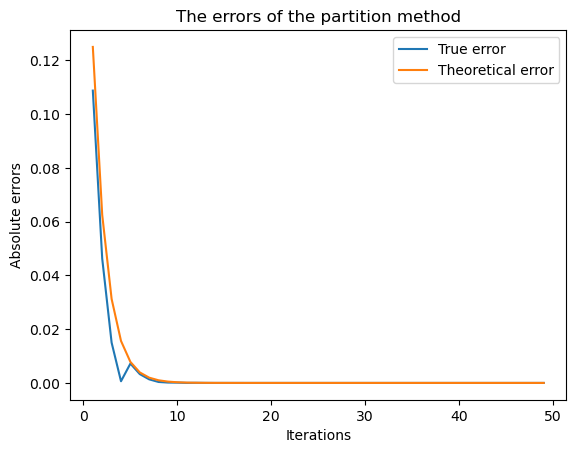

In [3]:
#Method 1 (Dixotomisi)
lim = 50
sol = np.zeros((lim))
ar_er = np.empty((0,lim))
true_er = np.empty((0,lim)) #In retrospect making the arrays empty and not zeroes, needed more work than intended
def f(x):
    return 2*x+3*np.sin(4*x)-math.exp(x) #Define your function here

def corrange(a,b): #This line of code makes sure that when we input the range a and b , we always get the correct sequence
    if(a<=b):
        return a,b
    return b,a

def sol(a,b): #This line of code returns the new range at which our solution lies
    a,b = corrange(a,b)
    m = (a+b)/2
    if (f(a)*f(b) == 0):
        return a,b
    elif (f(a)*f(m) < 0):
        return a,m
    return m,b

def error(a,b): #A cheap way to get the theoretical error
    return abs((a-b))/2
#Lets run that a few times to get our solution
#Starting values
a=0.5
b=1
var = 0.73375015637499441112368003814481 #The true solution was given by Mathematica with precision of 32 digits
#The number of iterations for the algorithm to find the theoretical error and the true error
for index in range(1,lim,1):
    a,b = sol(a,b)
    ar_er = np.append(ar_er,error(a,b))
    k = (a+b)/2
    true_er = np.append(true_er, abs(k-var))

it1 = errorfinder(0,ar_er)

print('The solution lies in the range[',a,',',b,']', 'with an error of',error(a,b))
#Printing the results of the theoretical and true error
x = np.linspace(1,len(ar_er),len(ar_er))
plt.plot(x,true_er,label='True error')
plt.plot(x,ar_er,label='Theoretical error')
plt.title('The errors of the partition method')
plt.xlabel('Iterations')
plt.ylabel('Absolute errors')
plt.legend()
plt.savefig('Partition_errors')
plt.show()

The error is less than 10^(-3) at the point of 3 iterations
The error is less than 10^(-6) at the point of 5 iterations
The error is less than 10^(-12) at the point of 6 iterations
The solution is 0.7337501563749944 with at least 12 digits of precision


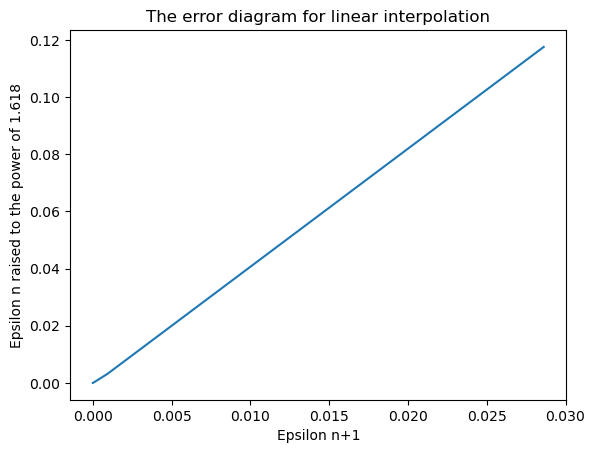

In [4]:
#Method 2 (Grammikhs paremvolhs)
lim =9
#we need a guess for the root in the range [x0,x1] with f(x1)f(x2)<0
x0 = 0.5
x1 = 1
#We shall make the function recursive 

def calc(x,y):
    x,y = corrange(x,y)
    return (y-f(y)/(f(y)-f(x))*(y-x))



def gpsol(n): #Its written in a way that x2 = gpsol(2)=calc(x1,x0)
    if(n == 1):
        return x1
    elif(n == 0 ):
        return x0
    else:
        return calc(gpsol(n-1),gpsol(n-2))

sol = np.empty((0,lim))
for index in range(1,lim):
    sol =np.append(sol,gpsol(index))

var = 0.73375015637499441112368003814481
it2 = errorfinder(var,sol)
print('The solution is',sol[lim-2],'with at least 12 digits of precision') #The -2 is due to the way the array and recursion function
#are defined.
#Its limit is about 10 iterations
true_err = np.zeros((lim-1)) #This makes sure the two arrays are of the same size
true_err = abs(var-sol)#e_n
new_true = true_err[1::] #e_n+1 , by removing the first element
true_err = (np.delete(true_err,-1))**1.618 #e_n^1.618 , by removing the last element and then raising every element of the array
#to the appropriate power
#All this array manipulation is done in order to plot the elements e_n**1.618 and e_n+1
plt.plot(new_true,true_err)
plt.title('The error diagram for linear interpolation')
plt.xlabel('Epsilon n+1')
plt.ylabel('Epsilon n raised to the power of 1.618')
plt.savefig('LERP_errors')
plt.show()



The error is less than 10^(-3) at the point of 3 iterations
The error is less than 10^(-6) at the point of 4 iterations
The error is less than 10^(-12) at the point of 5 iterations
The solution is 0.733750156374995 with at least 12 digits of precision


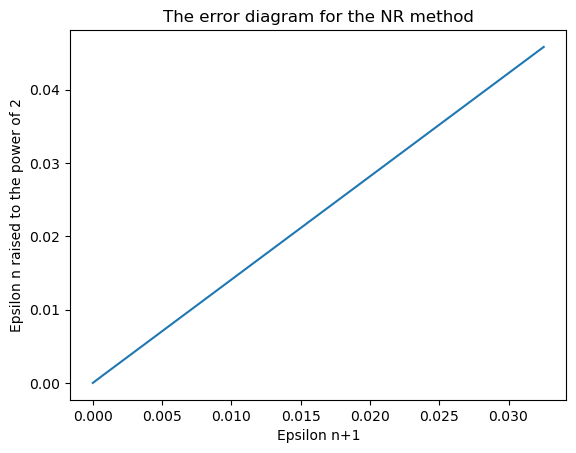

In [5]:
#Method 3 (Newton-Raphson)
lim =15
k = symbols('k')
f = 2*k+3*sin(4*k)-exp(k)
fprime = diff(f,k) #This is a generalized mode of code for every random function f, to save the trouble of differentiating
guess = 0.5
#Thats an easy recursive function

def help(n):
    return (f.subs(k,n).evalf())/(fprime.subs(k,n).evalf())

def lin(x):
    return x-help(x)
#I leave the print statements as comments to make sense of the code if necessery
def nrsol(n):
    if(n == 1):
        #print("finish")
        return lin(guess)
    else:  
        #print(n)
        return lin(nrsol(n-1))

sol = np.empty((0,lim))
for index in range(1,lim,1):
    sol =np.append(sol,nrsol(index))

var = 0.73375015637499441112368003814481
it3 = errorfinder(var,sol)
print('The solution is',sol[lim-2],'with at least 12 digits of precision')
#Using the same code as before
true_err = np.zeros((lim-1)) #This makes sure the two arrays are of the same size
true_err = abs(var-sol) #e_n
new_true = true_err[1::] #e_n+1 , by removing the first element
true_err = (np.delete(true_err,-1))**2 #e_n^2 , by removing the last element and then raising every element of the array
#to the appropriate power
#All this array manipulation is done in order to plot the elements e_n**1.618 and e_n+1
plt.plot(new_true,true_err)
plt.title('The error diagram for the NR method')
plt.xlabel('Epsilon n+1')
plt.ylabel('Epsilon n raised to the power of 2')
plt.savefig('NR_errors')
plt.show()


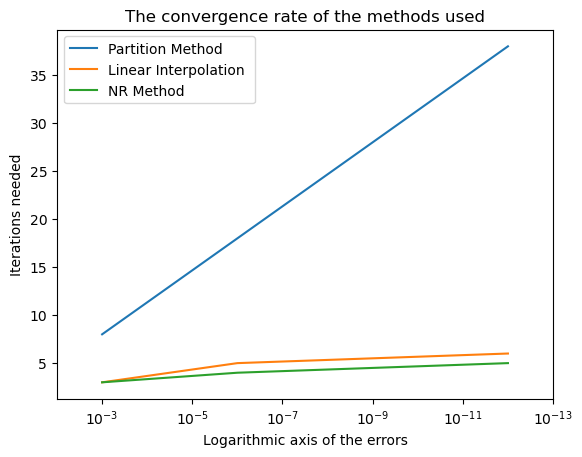

In [6]:
#Now to plot the number of iterations for each method
x = np.array([10**(-3),10**(-6),10**(-12)])
plt.semilogx(x,it1,label='Partition Method')
plt.semilogx(x,it2,label = 'Linear Interpolation ')
plt.semilogx(x,it3,label='NR Method')
plt.title('The convergence rate of the methods used')
plt.xlabel('Logarithmic axis of the errors')
plt.ylabel('Iterations needed')
plt.xlim(10**(-2),10**(-13))
plt.legend()
plt.savefig('Accuracy_Methods.png')
plt.show()
#It easily follows that the partition method while being the simplest of the two its also the slowest. The NR method
#proves to be the fastest while being closely tailed by linear interpolation

In [7]:
#Askhsh 2 (x=g(x))
lim =25
x0 = 4 #For the given equation with some ploting it can be deduced that the solution lies in the range [3.6,4.4]
def g(x): # This function satisfies the condtion that |g'(x)|<1 as seen in the plot below but for points only in [3.6 , 4.4]
    return 2 * np.log((3*x)/2 + 2*np.cos(x/4))
sol = np.empty(shape=(0,))
def gprime(x):
    numerator = 2 + 12*np.cos(4*x)
    denominator = 2*x + 3*np.sin(4*x)
    return numerator / denominator

def gfuncsol(n):
    if n ==0:
        return g(x0)
    return g(gfuncsol(n-1))


sol = np.empty(shape=(0,))
for index in range(1,lim,1):
    sol =np.append(sol,gfuncsol(index))
var = 3.8765873476127454821948958851863

errorfinder(var,sol)
print('The solution is',sol[lim-2],'with at least 12 digits of precision')


The error is less than 10^(-3) at the point of 4 iterations
The error is less than 10^(-6) at the point of 10 iterations
The error is less than 10^(-12) at the point of 21 iterations
The solution is 3.8765873476127752 with at least 12 digits of precision


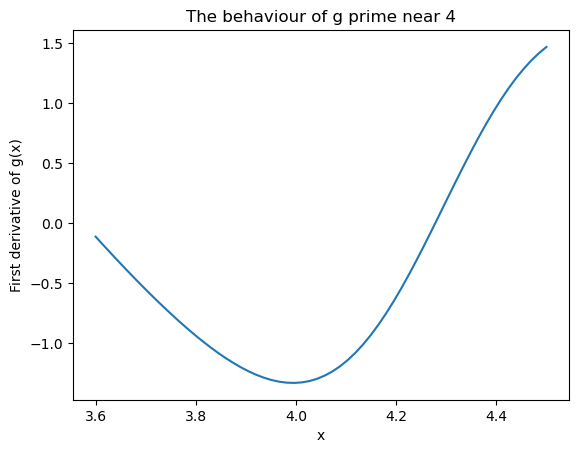

In [8]:
x = np.linspace(3.6,4.5,60)
y = gprime(x)
plt.plot(x,y)
plt.title('The behaviour of g prime near 4')
plt.xlabel('x')
plt.ylabel('First derivative of g(x)')
plt.savefig('gprime.png')
plt.show()
#The following plot proves that the condition for the derivative of g is satisfied in an interval near the solution

In [9]:
#Askhsh 3 me kanonikh N-R method
lim =95
k = symbols('k')
f = exp(k)*(k-1)**4
fprime = diff(f,k)
guess = 1.2

def help(n):
    return (f.subs(k,n).evalf())/(fprime.subs(k,n).evalf())

def lin(x):
    return x-help(x)

def nrsol(n):
    if(n == 1):
        return lin(guess)
    else:  
        return lin(nrsol(n-1))

sol = np.empty((0,lim))
for index in range(1,lim,1):
    sol =np.append(sol,nrsol(index))

var = 1
errorfinder(var,sol)
final1 = getdif(sol)
print('The solution is',sol[lim-2],'with at least 12 digits of precision')

The error is less than 10^(-3) at the point of 19 iterations
The error is less than 10^(-6) at the point of 43 iterations
The error is less than 10^(-12) at the point of 91 iterations
The solution is 1.00000000000039 with at least 12 digits of precision


In [10]:
#Askhsh 3 with many roots method
lim =15
k = symbols('k')
f = exp(k)*(k-1)**4 #The initial function
fprime = diff(f,k) #The first derivative
fdprime = diff(fprime,k) #The second derivative

guess = 1.2
#As the code we made is extremely versatile , with some changes it is possible to change it
#so that it solves the problem with m complexity in the root x = 1.

def help(n):
    numerator =(f.subs(k,n).evalf()*fprime.subs(k,n).evalf())
    denominator = (fprime.subs(k,n).evalf())**2-f.subs(k,n).evalf()*fdprime.subs(k,n).evalf()
    return numerator/denominator
def lin(x):
    return x-help(x)

def nrsol(n):
    if(n == 1):
        #print("finish")
        return lin(guess)
    else:  
        #print(n)
        return lin(nrsol(n-1))

sol = np.empty((0,lim))
for index in range(1,lim,1):
    sol =np.append(sol,nrsol(index))

var = 1.0
errorfinder(var,sol)
print('The solution is',sol[3],'with at least 12 digits of precision')
final2 = getdif(sol)
#It can be seen that the algorithm converges extremely quickly at the correct solution.The precision practically
#doubles with each step

The error is less than 10^(-3) at the point of 2 iterations
The error is less than 10^(-6) at the point of 3 iterations
The error is less than 10^(-12) at the point of 4 iterations
The solution is 1.00000000000000 with at least 12 digits of precision


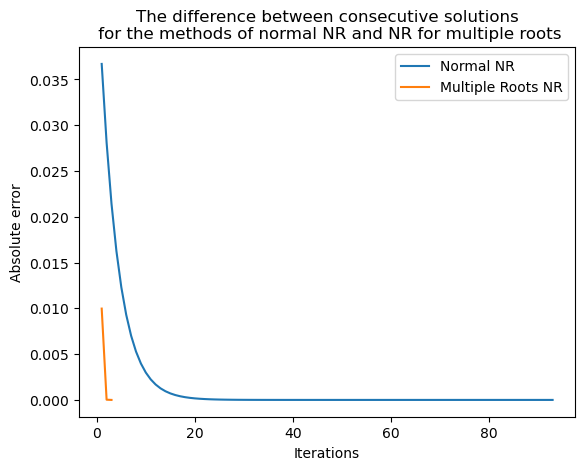

In [11]:
#Initializing the points of iteration for each array 
x1  = [i for i in range(1, len(final1)+1)]
x2 = [i for i in range(1, len(final2)+1)]
plt.plot(x1,final1,label='Normal NR')
plt.plot(x2,final2,label='Multiple Roots NR')
plt.legend()
#plt.xlim(1,20)
plt.title('The difference between consecutive solutions\n for the methods of normal NR and NR for multiple roots')
plt.xlabel('Iterations')
plt.ylabel('Absolute error')
plt.savefig('NRvsMRM.png')
plt.show()
#As it can be seen the normal NR follows a steady exponential decay while the method for multiple roots falls extremely sharply 
#and at practically a few iterations has reaches the maximum limit for float storage

In [12]:
#Askhsh 4
#Method 3 (Newton-Raphson)
lim =15
k = symbols('k')
f = 2*k - exp(k) + 3 -( 0.5*k - 2*k**3)
fprime = diff(f,k) #This is a generalized mode of code for every random function f, to save the trouble of differentiating
#every time we need a new function 
guess = 0
#Thats an easy recursive function

def help(n):
    return (f.subs(k,n).evalf())/(fprime.subs(k,n).evalf())

def lin(x):
    return x-help(x)
#I leave the print statements as comments to make sense of the code if necessery
def nrsol(n):
    if(n == 1):
        #print("finish")
        return lin(guess)
    else:  
        #print(n)
        return lin(nrsol(n-1))

sol = np.empty((0,lim))
for index in range(1,lim,1):
    sol =np.append(sol,nrsol(index))
def fnormal(x):
    return 0.5*x-2*x**3

print('The solution of the system is the point (' + str(sol[len(sol)-1]) + ', ' + str(fnormal(sol[len(sol)-1])) + ')'+' with 13 digit precision')




The solution of the system is the point (-0.862663512373204, 0.852636490690749) with 13 digit precision


The solution of the system is the point (-0.862663512373204489, 0.852636490690749) with 16 digit precision


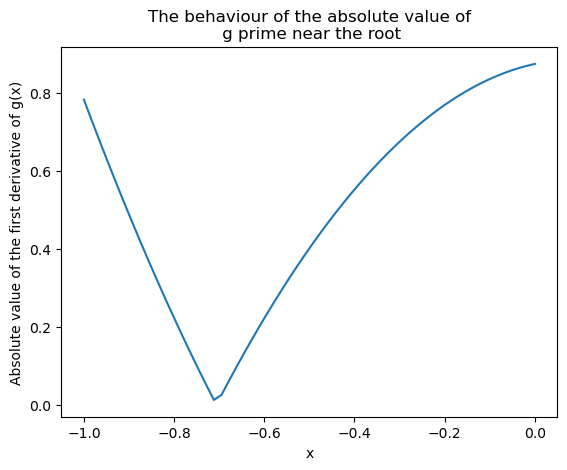

In [13]:
#Askhsh 2 (x=g(x))
lim =50
x0 = -1 #For the given equation with some ploting it can be deduced that the solution lies in the range [3.6,4.4]
def g(x): # This function satisfies the condtion that |g'(x)|<1 as seen in the plot below but for points only in [3.6 , 4.4]
    return (-3+np.exp(x)+2.5*x-2*x**3)/4

sol = np.empty(shape=(0,))

def gprime(x):
    return (2.5+np.exp(x)-6*x**2)/4

def gfuncsol(n):
    if n ==0:
        return g(x0)
    return g(gfuncsol(n-1))


sol = np.empty(shape=(0,))
for index in range(1,lim,1):
    sol =np.append(sol,gfuncsol(index))
    
num_str = "{:.18f}".format(sol[len(sol)-2])
print('The solution of the system is the point (' + num_str + ', ' + str(fnormal(sol[len(sol)-1])) + ')'+' with 16 digit precision')
x = np.linspace(-1,0,60)
y = abs(gprime(x))
plt.plot(x,y)
plt.title('The behaviour of the absolute value of\n g prime near the root')
plt.xlabel('x')
plt.ylabel('Absolute value of the first derivative of g(x)')
plt.savefig('gprimeex4.png')
plt.show()
#The following plot proves that the condition for the derivative of g is satisfied in an interval near the solution

In [14]:
end_time = time.time()
elapsed_time = end_time - start_time

print(f"The computational process took {elapsed_time:.2f} seconds")


The computational process took 1.68 seconds
